In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_job/train.csv")

In [3]:
train.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [4]:
train.describe(include='O')

,userID,jobID
count,6000,6000
unique,196,708
top,b052e2e0c0ad1b2d5036bd56e27d061c,da0d1111d2dc5d489242e60ebcbaf988
freq,106,50


In [5]:
train.isna().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [6]:
user_tags = pd.read_csv("train_job/user_tags.csv")
job_tags = pd.read_csv("train_job/job_tags.csv")
tags = pd.read_csv("train_job/tags.csv")
job_companies = pd.read_csv("train_job/job_companies.csv")

In [7]:
tags.describe(include='O')

,tagID,keyword
count,887,887
unique,887,887
top,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
freq,1,1


In [8]:
job_tags.describe(include = 'O')

,jobID,tagID
count,3477,3477
unique,733,240
top,e17184bcb70dcf3942c54e0b537ffc6d,0e095e054ee94774d6a496099eb1cf6a
freq,17,219


In [9]:
user_tags.describe()

,userID,tagID
count,17194,17194
unique,196,345
top,f69054686ba46877b6397ccdb8f51762,f47330643ae134ca204bf6b2481fec47
freq,572,820


In [10]:
job_companies.describe()

,companyID,jobID,companySize
count,733,733,643
unique,276,733,7
top,b5dc4e5d9b495d0196f61d45b26ef33e,e5f6ad6ce374177eef023bf5d0c018b6,11-50
freq,18,1,260


In [11]:
user_ids = pd.Series([x+1 for x in range(len(train['userID'].unique()))])
user_ids.index = train['userID'].unique()
user_id_dict = user_ids.to_dict()

user_id_dict

{'fe292163d06253b716e9a0099b42031d': 1,
 '6377fa90618fae77571e8dc90d98d409': 2,
 '8ec0888a5b04139be0dfe942c7eb4199': 3,
 'f862b39f767d3a1991bdeb2ea1401c9c': 4,
 'cac14930c65d72c16efac2c51a6b7f71': 5,
 'ed1ca6971578b1da0e4ad55b48d77fda': 6,
 '8109c2c482264f96f8ac69a9a99db308': 7,
 '14ccd7a3d2daa57d06f4741f0168bb1d': 8,
 '2afacaaf807c1843c41896ae794835d9': 9,
 'd7b2c4284fda91263ab9b89254cd7c43': 10,
 '8ec72a61b2adad097a1c3aa06751e8c4': 11,
 '6da6479250104018131de61655f1f385': 12,
 '4952d2ac78b534c78d7a21c60a236e4c': 13,
 '838c13b8aa97e2d988ef4495460f2e0e': 14,
 '2f05776d37d873642af484255572600d': 15,
 '40369b31ac85b623b72c3d50151ff55c': 16,
 'd41e0e6f6f1e29098d9d152511503ab2': 17,
 '879b56cccf6b57314ad724c65cf270e9': 18,
 'b3c865b84617fa5e555865ebe0e54612': 19,
 'b052e2e0c0ad1b2d5036bd56e27d061c': 20,
 'a35af76a1c0bb174a3cfc66592804848': 21,
 'c70daf247944fe3add32218f914c75a6': 22,
 'cb08b2c94dbb772324444bb4ed7cc1a4': 23,
 'e75d4d01cecdda3c64483016bd6af4c1': 24,
 'cea22b0ec5545a7c12879c8

In [12]:
job_ids = pd.Series([x+1 for x in range(len(job_tags['jobID'].unique()))])
job_ids.index = job_tags['jobID'].unique()
job_id_dict = job_ids.to_dict()

job_id_dict

# 식별하기 편하게 dictionary화

{'320722549d1751cf3f247855f937b982': 1,
 'e744f91c29ec99f0e662c9177946c627': 2,
 'e820a45f1dfc7b95282d10b6087e11c0': 3,
 '53c3bce66e43be4f209556518c2fcb54': 4,
 'fd06b8ea02fe5b1c2496fe1700e9d16c': 5,
 '6e7d2da6d3953058db75714ac400b584': 6,
 '818f4654ed39a1c147d1e51a00ffb4cb': 7,
 '019d385eb67632a7e958e23f24bd07d7': 8,
 '8757150decbd89b0f5442ca3db4d0e0e': 9,
 '3871bd64012152bfb53fdf04b401193f': 10,
 '1651cf0d2f737d7adeab84d339dbabd3': 11,
 '7f975a56c761db6506eca0b37ce6ec87': 12,
 '66808e327dc79d135ba18e051673d906': 13,
 '50c3d7614917b24303ee6a220679dab3': 14,
 '884ce4bb65d328ecb03c598409e2b168': 15,
 'b5b41fac0361d157d9673ecb926af5ae': 16,
 'ce5140df15d046a66883807d18d0264b': 17,
 '96b9bff013acedfb1d140579e2fbeb63': 18,
 'dc912a253d1e9ba40e2c597ed2376640': 19,
 '24146db4eb48c718b84cae0a0799dcfc': 20,
 'a8ecbabae151abacba7dbde04f761c37': 21,
 'c60d060b946d6dd6145dcbad5c4ccf6f': 22,
 'e5e63da79fcd2bebbd7cb8bf1c1d0274': 23,
 '15d4e891d784977cacbfcbb00c48f133': 24,
 '65cc2c8205a05d7379fa3a6

In [13]:
company_ids = pd.Series([x+1 for x in range(len(job_companies['companyID'].unique()))])
company_ids.index = job_companies['companyID'].unique()
company_id_dict = company_ids.to_dict()

company_id_dict

{'00411460f7c92d2124a67ea0f4cb5f85': 1,
 '1905aedab9bf2477edc068a355bba31a': 2,
 '89fcd07f20b6785b92134bd6c1d0fa42': 3,
 'acf4b89d3d503d8252c9c4ba75ddbf6d': 4,
 'fb7b9ffa5462084c5f4e7e85a093e6d7': 5,
 'ac627ab1ccbdb62ec96e702f07f6425b': 6,
 '9ad6aaed513b73148b7d49f70afcfb32': 7,
 'd707329bece455a462b58ce00d1194c9': 8,
 '884d79963bd8bc0ae9b13a1aa71add73': 9,
 '2e65f2f2fdaf6c699b223c61b1b5ab89': 10,
 '217eedd1ba8c592db97d0dbe54c7adfc': 11,
 '3b5dca501ee1e6d8cd7b905f4e1bf723': 12,
 'fa14d4fe2f19414de3ebd9f63d5c0169': 13,
 '6c4b761a28b734fe93831e3fb400ce87': 14,
 '8fecb20817b3847419bb3de39a609afe': 15,
 'd34ab169b70c9dcd35e62896010cd9ff': 16,
 '66808e327dc79d135ba18e051673d906': 17,
 'b5dc4e5d9b495d0196f61d45b26ef33e': 18,
 '64223ccf70bbb65a3a4aceac37e21016': 19,
 'a368b0de8b91cfb3f91892fbf1ebd4b2': 20,
 'c4851e8e264415c4094e4e85b0baa7cc': 21,
 'cdc0d6e63aa8e41c89689f54970bb35f': 22,
 'c5ab0bc60ac7929182aadd08703f1ec6': 23,
 'e0cf1f47118daebc5b16269099ad7347': 24,
 'c45147dee729311ef5b5c30

In [14]:
train['userID'].replace(user_id_dict, inplace=True)
train['jobID'].replace(job_id_dict, inplace=True)
job_tags['jobID'].replace(job_id_dict, inplace=True)
user_tags['userID'].replace(user_id_dict, inplace=True)
job_companies['jobID'].replace(job_id_dict, inplace=True)
job_companies['companyID'].replace(company_id_dict, inplace=True)

In [15]:
train.head()

,userID,jobID,applied
0,1,372,0
1,2,458,0
2,3,527,1
3,4,316,0
4,5,49,0


<AxesSubplot:xlabel='applied', ylabel='count'>

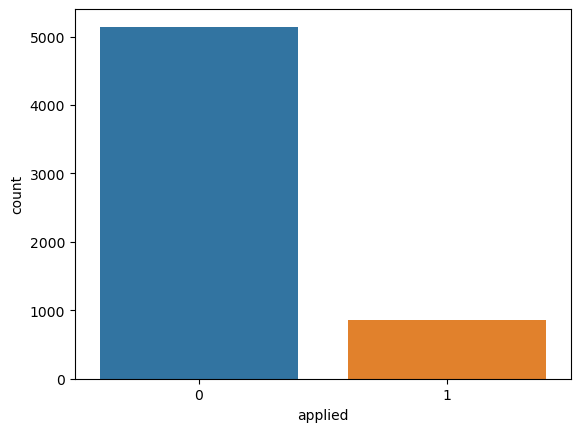

In [16]:
sns.countplot(train["applied"])

In [17]:
user_tags.duplicated().sum()

14612

In [18]:
user_tags = user_tags.drop_duplicates().reset_index(drop=True)
user_tags

,userID,tagID
0,72,82c2559140b95ccda9c6ca4a8b981f1e
1,72,2ba8698b79439589fdd2b0f7218d8b07
2,72,351b33587c5fdd93bd42ef7ac9995a28
3,72,81e5f81db77c596492e6f1a5a792ed53
4,72,0e095e054ee94774d6a496099eb1cf6a
...,...,...
2577,126,c8ba76c279269b1c6bc8a07e38e78fa4
2578,126,38ca89564b2259401518960f7a06f94b
2579,126,0e095e054ee94774d6a496099eb1cf6a
2580,126,884d79963bd8bc0ae9b13a1aa71add73


In [19]:
# 고유 아이디 별 지원한 공고 그룹핑
def applied_job_list(x):
    return x.loc[x['applied']==1, 'jobID'].tolist()

applied_list = train.groupby('userID').apply(lambda x:applied_job_list(x))
applied_list

userID
1      [357, 378, 171, 122, 155, 126, 47, 434]
2                                           []
3                              [527, 730, 134]
4                     [138, 183, 10, 134, 654]
5                           [45, 320, 52, 303]
                        ...                   
192                       [171, 378, 126, 122]
193                            [713, 378, 518]
194                             [122, 717, 19]
195                                      [134]
196                     [514, 125, 19, 371, 2]
Length: 196, dtype: object

In [20]:
train[train['applied']==1].count()

userID     857
jobID      857
applied    857
dtype: int64

In [21]:
applied_sum = train[train['applied']==1].count()[0]

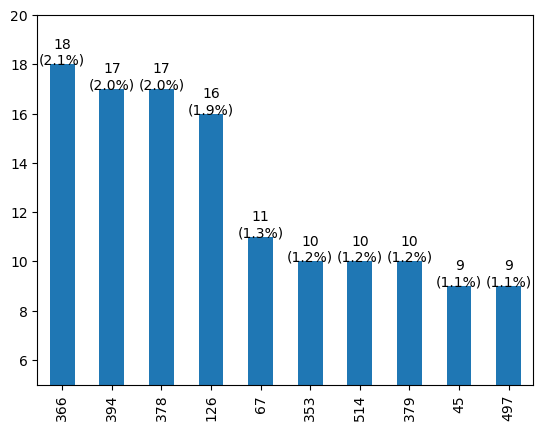

In [22]:
# 지원자가 많은 공고 확인
train.loc[train['applied']==1, "jobID"].value_counts()[:10].plot(kind="bar", ylim=[5, 20])

object_cnt = train.loc[train['applied']==1, 'jobID'].value_counts()[:10]
for x, y, z in zip(range(10), object_cnt.values, object_cnt.values/applied_sum*100):
    plt.annotate(f"{y}\n({round(z, 1)}%)", xy=(x, y), textcoords="data", ha="center")

In [23]:
# 지원자가 많은 공고를 낸 회사의 규모는?
job_companies[job_companies['jobID'].isin([366, 394, 378, 126, 67, 353, 514, 379, 45, 497])]

,companyID,jobID,companySize
27,27,353,NaN
40,39,379,11-50
126,93,366,101-200
132,96,378,101-200
140,102,394,201-500
206,53,45,1-10
310,93,67,101-200
341,175,126,NaN
377,131,497,51-100
478,93,514,101-200


<AxesSubplot:>

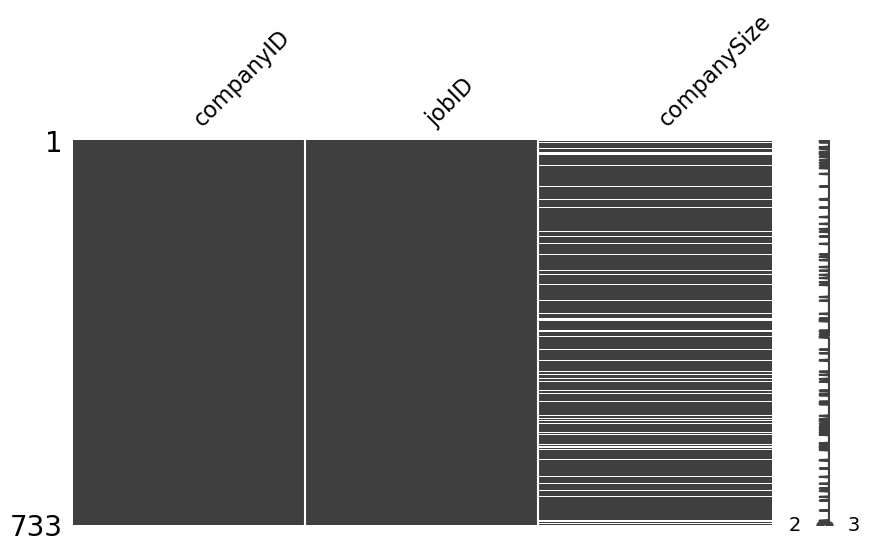

In [24]:
import missingno as msno

msno.matrix(job_companies, figsize=(10, 5))

In [25]:
job_companies.isna().sum()

companyID       0
jobID           0
companySize    90
dtype: int64

In [26]:
job_companies.describe(include='O')

,companySize
count,643
unique,7
top,11-50
freq,260


In [27]:
job_companies['companySize'].unique()

array([nan, '11-50', '101-200', '1-10', '51-100', '1000 이상', '201-500',
       '501-1000'], dtype=object)

In [28]:
tags.index = tags['tagID']

In [29]:
tags_to_dict = tags['keyword'].to_dict()
tags_to_dict

{'602d1305678a8d5fdb372271e980da6a': 'Amazon Web Services(AWS)',
 'e3251075554389fe91d17a794861d47b': 'Tensorflow',
 'a1d50185e7426cbb0acad1e6ca74b9aa': 'Docker',
 '884d79963bd8bc0ae9b13a1aa71add73': 'Git',
 '4122cb13c7a474c1976c9706ae36521d': 'Python',
 '6e7d2da6d3953058db75714ac400b584': 'Go',
 '208e43f0e45c4c78cafadb83d2888cb6': 'Deep Learning',
 'fe2d010308a6b3799a3d9c728ee74244': 'Machine Learning',
 '42d6c7d61481d1c21bd1635f59edae05': 'JSP',
 '97416ac0f58056947e2eb5d5d253d4f2': 'Framework7',
 '0e095e054ee94774d6a496099eb1cf6a': 'JavaScript',
 '6ecbdd6ec859d284dc13885a37ce8d81': 'CAD',
 '6d3a1e06d6a06349436bc054313b648c': 'Qt',
 'bb04af0f7ecaee4aae62035497da1387': 'C++',
 'e702e51da2c0f5be4dd354bb3e295d37': 'C',
 'f47330643ae134ca204bf6b2481fec47': 'Java',
 '109d2dd3608f669ca17920c511c2a41e': 'D3.js',
 '81dc9bdb52d04dc20036dbd8313ed055': 'ReactJS',
 '801c14f07f9724229175b8ef8b4585a8': 'CSS',
 '7d771e0e8f3633ab54856925ecdefc5d': 'HTML',
 '8a3363abe792db2d8761d6403605aeb7': 'Django'

In [30]:
user_tags['tagID'] = user_tags['tagID'].map(tags_to_dict)

In [31]:
job_tags['tagID'] = job_tags['tagID'].map(tags_to_dict)

In [32]:
user_tags.groupby('tagID').count().sort_values(by='userID', ascending=False)[:10]

,userID
tagID,
Java,115
JavaScript,113
MySQL,93
Node.js,81
Spring,76
Python,56
HTML,55
Android,51
jQuery,51


In [33]:
job_tags.groupby('tagID').count().sort_values(by='jobID', ascending=False)[:10]

,jobID
tagID,
JavaScript,219
Java,197
Python,187
Node.js,153
MySQL,143
ReactJS,131
HTML,115
CSS,114
Git,103


In [34]:
job_companies.groupby('companySize').count()

,companyID,jobID
companySize,,
1-10,100,100
1000 이상,13,13
101-200,60,60
11-50,260,260
201-500,56,56
501-1000,12,12
51-100,142,142


In [35]:
job_tags_list = job_tags.groupby('jobID')[['tagID']].apply(lambda x:x['tagID'].tolist()).rename('jobTag')
job_tags_list

jobID
1                                  [Ruby, Ruby on Rails]
2                             [Node.js, JavaScript, Git]
3      [HTML, Vue.js, AngularJS, JavaScript, CSS, Rea...
4                          [Apache Spark, Apache Hadoop]
5      [Django, Docker, AWS EC2, JavaScript, BitBucke...
                             ...                        
729                                            [Android]
730                                       [React Native]
731                                              [Swift]
732                                       [React Native]
733                                              [Swift]
Name: jobTag, Length: 733, dtype: object

In [36]:
test = job_tags.groupby('jobID')[['tagID']]

In [37]:
job_info = pd.merge(job_tags_list, job_companies, on="jobID").set_index("jobID")
job_info

,jobTag,companyID,companySize
jobID,,,
1,"[Ruby, Ruby on Rails]",35,11-50
2,"[Node.js, JavaScript, Git]",61,51-100
3,"[HTML, Vue.js, AngularJS, JavaScript, CSS, Rea...",154,1-10
4,"[Apache Spark, Apache Hadoop]",40,201-500
5,"[Django, Docker, AWS EC2, JavaScript, BitBucke...",155,1-10
...,...,...,...
729,[Android],26,101-200
730,[React Native],189,1-10
731,[Swift],67,101-200


In [38]:
applied_list

userID
1      [357, 378, 171, 122, 155, 126, 47, 434]
2                                           []
3                              [527, 730, 134]
4                     [138, 183, 10, 134, 654]
5                           [45, 320, 52, 303]
                        ...                   
192                       [171, 378, 126, 122]
193                            [713, 378, 518]
194                             [122, 717, 19]
195                                      [134]
196                     [514, 125, 19, 371, 2]
Length: 196, dtype: object

In [39]:
train.groupby('jobID').count()

,userID,applied
jobID,,
1,7,7
2,24,24
3,27,27
4,6,6
5,8,8
...,...,...
729,8,8
730,9,9
731,5,5


In [40]:
test = train[train['applied']==1].groupby('jobID')[['userID']].apply(lambda x:x.count())

In [41]:
test['jobID'] = test.index

In [42]:
test.reset_index(drop=True, inplace=True)
test_list = pd.merge(test, job_companies, on='jobID')

In [43]:
test_list.sort_values(by='userID', ascending=False)[:20]

,userID,jobID,companyID,companySize
199,18,366,93,101-200
215,17,394,102,201-500
208,17,378,96,101-200
81,16,126,175,NaN
45,11,67,93,101-200
283,10,514,93,101-200
192,10,353,27,NaN
209,10,379,39,11-50
30,9,45,53,1-10
273,9,497,131,51-100


In [44]:
test_list.sort_values(by='userID', ascending=True)[:20]

,userID,jobID,companyID,companySize
172,1,322,12,11-50
174,1,325,83,11-50
179,1,331,17,NaN
183,1,339,21,101-200
185,1,342,85,51-100
186,1,343,14,NaN
187,1,344,86,51-100
191,1,352,88,11-50
195,1,357,29,11-50
200,1,368,18,51-100


In [45]:
job_companies['companySize'].value_counts()

11-50       260
51-100      142
1-10        100
101-200      60
201-500      56
1000 이상      13
501-1000     12
Name: companySize, dtype: int64

In [46]:
job_info = job_info.fillna('11-50')
job_info

,jobTag,companyID,companySize
jobID,,,
1,"[Ruby, Ruby on Rails]",35,11-50
2,"[Node.js, JavaScript, Git]",61,51-100
3,"[HTML, Vue.js, AngularJS, JavaScript, CSS, Rea...",154,1-10
4,"[Apache Spark, Apache Hadoop]",40,201-500
5,"[Django, Docker, AWS EC2, JavaScript, BitBucke...",155,1-10
...,...,...,...
729,[Android],26,101-200
730,[React Native],189,1-10
731,[Swift],67,101-200


In [47]:
company_size_dict = { '1-10':0, '11-50':1, '51-100':2, '101-200':3, '201-500':4, '501-1000':5, '1000 이상':6 }

train = pd.merge(train, job_info, on='jobID')
train

,userID,jobID,applied,jobTag,companyID,companySize
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50
1,33,372,0,"[Ruby on Rails, Ruby]",35,11-50
2,22,372,0,"[Ruby on Rails, Ruby]",35,11-50
3,158,372,1,"[Ruby on Rails, Ruby]",35,11-50
4,91,372,0,"[Ruby on Rails, Ruby]",35,11-50
...,...,...,...,...,...,...
5995,115,599,0,"[Python, Apache Hadoop, SQL, Java, JavaScript,...",134,501-1000
5996,112,202,0,"[Swift, iOS, Objective-C]",165,11-50
5997,47,442,0,"[AWS EC2, Docker, AWS RDS]",35,11-50
5998,53,558,1,"[Swift, Tensorflow, Python, JSP, Ionic, Vue.js...",223,1-10


In [48]:
train.sort_values(by='userID', ascending=True)

,userID,jobID,applied,jobTag,companyID,companySize
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50
5009,1,60,0,"[MyBatis, jQuery, AWS EC2, Amazon Web Services...",59,11-50
4995,1,673,0,"[Ionic, Java, Kotlin, Swift]",29,11-50
388,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10
2219,1,381,0,"[Scala, Python, C#, Java, Datadog, Rust, Go, C...",40,201-500
...,...,...,...,...,...,...
5710,196,13,0,"[ES6, GraphQL, Vue.js, Docker]",142,11-50
1462,196,122,0,"[ExpressJS, Node.js, ReactJS, Java, JavaScript]",175,11-50
3316,196,47,0,"[TypeScript, GraphQL, Node.js, JavaScript]",35,11-50
5338,196,125,1,"[CSS, JavaScript, ES6, HTML, AngularJS]",27,11-50


In [49]:
train.sort_values(by=['userID', 'jobID'], ascending=True)

,userID,jobID,applied,jobTag,companyID,companySize
3343,1,47,1,"[TypeScript, GraphQL, Node.js, JavaScript]",35,11-50
1345,1,59,0,"[C++, C#]",40,201-500
5009,1,60,0,"[MyBatis, jQuery, AWS EC2, Amazon Web Services...",59,11-50
1464,1,122,1,"[ExpressJS, Node.js, ReactJS, Java, JavaScript]",175,11-50
1519,1,126,1,"[NoSQL, Java, OOP, Spring]",175,11-50
...,...,...,...,...,...,...
1462,196,122,0,"[ExpressJS, Node.js, ReactJS, Java, JavaScript]",175,11-50
5338,196,125,1,"[CSS, JavaScript, ES6, HTML, AngularJS]",27,11-50
2780,196,371,1,"[JavaScript, ReactJS, Vue.js, Node.js]",35,11-50
4882,196,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50


In [50]:
# 1. 지원 횟수 계산

train = pd.merge(train, train.groupby('userID')[['applied']].sum().reset_index(), left_on='userID', right_on='userID')
train

,userID,jobID,applied_x,jobTag,companyID,companySize,applied_y
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8
1,1,730,0,[React Native],189,1-10,8
2,1,413,0,"[Java, Kotlin]",45,11-50,8
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8
4,1,59,0,"[C++, C#]",40,201-500,8
...,...,...,...,...,...,...,...
5995,191,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50,3
5996,191,490,0,"[PostgreSQL, Python, AWS Lambda]",153,11-50,3
5997,191,359,0,"[Redis, jQuery, Elasticsearch, Apache Tomcat, ...",30,1000 이상,3
5998,195,134,1,"[PostgreSQL, MariaDB, SQLAlchemy, Nginx, Naver...",13,11-50,1


In [51]:
train.rename(columns={'applied_x':'applied', 'applied_y':'applied_count'}, inplace=True)
train

,userID,jobID,applied,jobTag,companyID,companySize,applied_count
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8
1,1,730,0,[React Native],189,1-10,8
2,1,413,0,"[Java, Kotlin]",45,11-50,8
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8
4,1,59,0,"[C++, C#]",40,201-500,8
...,...,...,...,...,...,...,...
5995,191,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50,3
5996,191,490,0,"[PostgreSQL, Python, AWS Lambda]",153,11-50,3
5997,191,359,0,"[Redis, jQuery, Elasticsearch, Apache Tomcat, ...",30,1000 이상,3
5998,195,134,1,"[PostgreSQL, MariaDB, SQLAlchemy, Nginx, Naver...",13,11-50,1


In [52]:
# 2. 지원자의 skill과 지원 공고의 skill간 fit 여부

tag_list = user_tags.groupby('userID')[['tagID']].apply(lambda x:x['tagID'].tolist()).rename('userTag')
tag_list

userID
1      [MongoDB, Docker, Java, Jenkins, ExpressJS, Op...
2      [Java, Apache Tomcat, HTML5, ReactJS, Apache S...
3      [Raspberry Pi, Android, Cuckoo Sandbox, Facebo...
4      [MariaDB, Raspberry Pi, HTML, TypeScript, Flas...
5      [Spring, AWS EC2, CSS3, KakaoPay API, Spring D...
                             ...                        
192       [Thymeleaf, Spring, C#, MyBatis, Java, Python]
193    [Gradle, jQuery, Spring Boot, HTML, MySQL, Jav...
194    [RxJS, ES6, i18n, RxJava, Apache Maven, Spring...
195    [Android, Raspberry Pi, MySQL, Linux, C, Maria...
196    [Sass(SCSS), GraphQL, Jest, MariaDB, ReactJS, ...
Name: userTag, Length: 196, dtype: object

In [53]:
train = pd.merge(train, tag_list, on='userID')
train

,userID,jobID,applied,jobTag,companyID,companySize,applied_count,userTag
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
1,1,730,0,[React Native],189,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
2,1,413,0,"[Java, Kotlin]",45,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
4,1,59,0,"[C++, C#]",40,201-500,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
...,...,...,...,...,...,...,...,...
5995,191,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax..."
5996,191,490,0,"[PostgreSQL, Python, AWS Lambda]",153,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax..."
5997,191,359,0,"[Redis, jQuery, Elasticsearch, Apache Tomcat, ...",30,1000 이상,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax..."
5998,195,134,1,"[PostgreSQL, MariaDB, SQLAlchemy, Nginx, Naver...",13,11-50,1,"[Android, Raspberry Pi, MySQL, Linux, C, Maria..."


In [54]:
train['tagCorr'] = train.apply(lambda x:list(set(x['jobTag'])&set(x['userTag'])), axis=1)

In [55]:
train.head()

,userID,jobID,applied,jobTag,companyID,companySize,applied_count,userTag,tagCorr
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]
1,1,730,0,[React Native],189,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]
2,1,413,0,"[Java, Kotlin]",45,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java]
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java]
4,1,59,0,"[C++, C#]",40,201-500,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]


In [56]:
train

,userID,jobID,applied,jobTag,companyID,companySize,applied_count,userTag,tagCorr
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]
1,1,730,0,[React Native],189,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]
2,1,413,0,"[Java, Kotlin]",45,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java]
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java]
4,1,59,0,"[C++, C#]",40,201-500,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[]
...,...,...,...,...,...,...,...,...,...
5995,191,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...","[Python, Django, Java, JavaScript, HTML, CSS]"
5996,191,490,0,"[PostgreSQL, Python, AWS Lambda]",153,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...",[Python]
5997,191,359,0,"[Redis, jQuery, Elasticsearch, Apache Tomcat, ...",30,1000 이상,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...","[Python, JavaScript, Java]"
5998,195,134,1,"[PostgreSQL, MariaDB, SQLAlchemy, Nginx, Naver...",13,11-50,1,"[Android, Raspberry Pi, MySQL, Linux, C, Maria...","[MariaDB, MySQL]"


In [57]:
train['tagCorrCount'] = train.tagCorr.apply(lambda x:len(x))

In [58]:
train

,userID,jobID,applied,jobTag,companyID,companySize,applied_count,userTag,tagCorr,tagCorrCount
0,1,372,0,"[Ruby on Rails, Ruby]",35,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[],0
1,1,730,0,[React Native],189,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[],0
2,1,413,0,"[Java, Kotlin]",45,11-50,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java],1
3,1,464,0,"[NoSQL, Amazon Web Services(AWS), Java, REST A...",70,1-10,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[Java],1
4,1,59,0,"[C++, C#]",40,201-500,8,"[MongoDB, Docker, Java, Jenkins, ExpressJS, Op...",[],0
...,...,...,...,...,...,...,...,...,...,...
5995,191,439,0,"[Django, MongoDB, Vue.js, ReactJS, HTML, Java,...",117,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...","[Python, Django, Java, JavaScript, HTML, CSS]",6
5996,191,490,0,"[PostgreSQL, Python, AWS Lambda]",153,11-50,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...",[Python],1
5997,191,359,0,"[Redis, jQuery, Elasticsearch, Apache Tomcat, ...",30,1000 이상,3,"[Bootstrap, Java, Spring, Django, Oracle, Ajax...","[Python, JavaScript, Java]",3
5998,195,134,1,"[PostgreSQL, MariaDB, SQLAlchemy, Nginx, Naver...",13,11-50,1,"[Android, Raspberry Pi, MySQL, Linux, C, Maria...","[MariaDB, MySQL]",2


In [59]:
test = pd.read_csv("test_job.csv")

# test에 똑같이 전처리
test['userID'] = test['userID'].map(user_id_dict)
test['jobID'] = test['jobID'].map(job_id_dict)
test = pd.merge(test, job_info, on='jobID')

train['companySize'] = train['companySize'].map(company_size_dict)
test['companySize'] = test['companySize'].map(company_size_dict)

test = pd.merge(test, train.groupby('userID')[["applied"]].sum().reset_index(), left_on='userID', right_on='userID')
test.rename(columns={'applied':'applied_count'}, inplace=True)

test = pd.merge(test, tag_list, on='userID')
test['tagCorr'] = test.apply(lambda x:list(set(x['jobTag'])&set(x['userTag'])), axis=1)
test['tagCorrCount'] = test.tagCorr.apply(lambda x:len(x))

In [60]:
test

,userID,jobID,jobTag,companyID,companySize,applied_count,userTag,tagCorr,tagCorrCount
0,49,422,"[MongoDB, Git, Node.js, AWS S3, C#, HTML, Type...",110,1,5,"[CSS, PHP, AWS Cognito, HTML, Google BigQuery,...","[MongoDB, HTML, Node.js]",3
1,49,150,"[Git, ExpressJS, JavaScript, MySQL, Node.js]",78,1,5,"[CSS, PHP, AWS Cognito, HTML, Google BigQuery,...","[MySQL, Node.js]",2
2,49,33,"[Mocha, CSS, Linux, REST API, Node.js, Express...",87,1,5,"[CSS, PHP, AWS Cognito, HTML, Google BigQuery,...","[MySQL, AWS Lambda, Node.js, HTML, CSS]",5
3,49,303,"[PHP, Python, MySQL]",67,3,5,"[CSS, PHP, AWS Cognito, HTML, Google BigQuery,...","[Python, PHP, MySQL]",3
4,49,55,"[Java, JavaScript]",111,1,5,"[CSS, PHP, AWS Cognito, HTML, Google BigQuery,...",[],0
...,...,...,...,...,...,...,...,...,...
2430,48,710,"[Qt, C++]",201,1,2,"[Trello, Embedded System, Tensorflow, Raspberr...",[C++],1
2431,74,61,"[ReactJS, AngularJS, JavaScript, HTML, TypeScr...",88,1,6,"[Shell, Android, C, MySQL, C#, 소켓, ncurses]",[],0
2432,74,203,"[Unity, JavaScript]",78,1,6,"[Shell, Android, C, MySQL, C#, 소켓, ncurses]",[],0
2433,74,213,"[Git, iOS, RxSwift, Swift]",107,0,6,"[Shell, Android, C, MySQL, C#, 소켓, ncurses]",[],0


In [61]:
drop_col = ['userID', 'jobID', 'jobTag', 'userTag', 'tagCorr']
X_train = train.drop(columns=drop_col)
X_train = X_train.drop(columns='applied')
Y_train = train['applied']

X_test = test.drop(columns=drop_col)

In [62]:
X_train

,companyID,companySize,applied_count,tagCorrCount
0,35,1,8,0
1,189,0,8,0
2,45,1,8,1
3,70,0,8,1
4,40,4,8,0
...,...,...,...,...
5995,117,1,3,6
5996,153,1,3,1
5997,30,6,3,3
5998,13,1,1,2


In [63]:
X_train.corr()

,companyID,companySize,applied_count,tagCorrCount
companyID,1.000000,-0.042455,0.033419,0.007029
companySize,-0.042455,1.000000,-0.018004,0.019150
applied_count,0.033419,-0.018004,1.000000,0.049777
tagCorrCount,0.007029,0.019150,0.049777,1.000000


<AxesSubplot:>

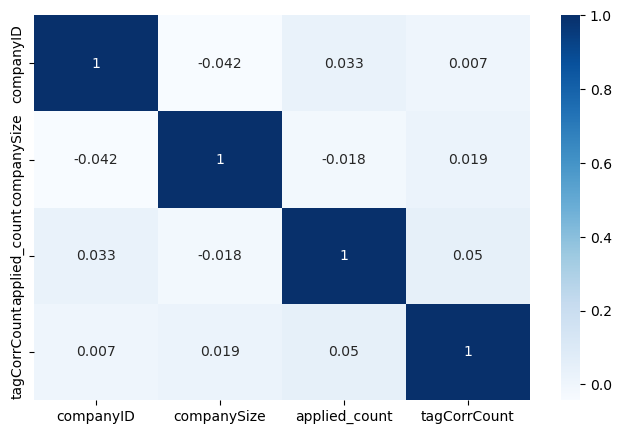

In [64]:
plt.figure(figsize=(8, 5))
sns.heatmap(X_train.corr(), annot=True, cmap='Blues')

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_train)

acc = accuracy_score(Y_train, pred)
acc

0.8566666666666667

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, Y_train)
pred = rf.predict(X_train)

acc = accuracy_score(Y_train, pred)
acc

0.9276666666666666

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
rf_params = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : range(2, 20, 2)
}

grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
grid_rf.fit(X_train, Y_train)

pred = grid_rf.predict(X_train)
acc = accuracy_score(Y_train, pred)

acc

0.8571666666666666

In [70]:
grid_rf.best_params_

{'max_depth': 2, 'n_estimators': 200}

In [71]:
rf_new = RandomForestClassifier(max_depth=2, n_estimators=50)
rf_new.fit(X_train, Y_train)
pred = rf_new.predict(X_train)
acc = accuracy_score(Y_train, pred)
acc

pred_test = rf_new.predict(X_test)

In [72]:
X_train

,companyID,companySize,applied_count,tagCorrCount
0,35,1,8,0
1,189,0,8,0
2,45,1,8,1
3,70,0,8,1
4,40,4,8,0
...,...,...,...,...
5995,117,1,3,6
5996,153,1,3,1
5997,30,6,3,3
5998,13,1,1,2


In [74]:
pred_test.sum() # 전부 0으로 예상해버림ㅋㅋ..

0

In [76]:
output = pd.DataFrame({
    "applied":pred_test
})

In [79]:
output.to_csv('submission.csv', index=False)